In [1]:
#!pip install geopandas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

### **Pitch: Predicción de ROI en Rehabilitaciones Energéticas**

El sector residencial en Europa enfrenta el desafío de cumplir con las normativas de eficiencia energética, que exigen que los inmuebles destinados a **venta o alquiler** alcancen calificaciones mínimas **E** para 2030 y **D** para 2033. Estas metas no solo buscan reducir emisiones, sino también **mejorar la calidad de vida** y **disminuir la pobreza energética** en los hogares, garantizando un acceso más justo a sistemas energéticos eficientes.

---

#### **Objetivo del proyecto**
Desarrollar un modelo de **Machine Learning** que prediga el **ROI esperado** en rehabilitaciones energéticas de edificios residenciales, utilizando datos de características constructivas, energéticas y de demanda energética.

---

#### **Variables utilizadas**
1. **Identificación y características básicas:**
   - `referencia_catastral`: Identificador único del edificio.
   - `uso_principal`: Uso del edificio (enfoque en residencial).
   - `altura_maxima`: Número de plantas del edificio.
   - `ano_construccion`: Año de construcción del edificio.
   - `superficie_vivienda`: Superficie promedio por vivienda en m².
   - `numero_viviendas`: Número total de viviendas en el edificio.
2. **Demanda energética:**
   - `demanda_calefaccion`: Consumo energético actual (kWh/m²·año).
   - `demanda_calefaccion_post_interverncion`: Consumo estimado tras la intervención.
3. **Coste de intervención:**
   - `coste_intervencion_m2`: Coste de la intervención por metro cuadrado (€).
4. **Variable objetivo (target):**
   - `roi`: Ahorro energético anual (€) dividido entre el coste total de la intervención (€).

*Fuente de los datos: [Urban3r](https://urban3r.es/).*

---

#### **Impacto**
Este modelo permitirá a **administraciones públicas** y **constructoras**:
- **Optimizar recursos:** Identificar edificios con mayor retorno de inversión, priorizando intervenciones donde el ahorro energético compense rápidamente los costes.
- **Aumentar la calidad de vida:** Reducir la pobreza energética mejorando las condiciones térmicas y económicas de los hogares.
- **Cumplimiento normativo:** Acelerar la transición hacia metas de sostenibilidad para 2030 y 2033, priorizando las intervenciones más efectivas para edificios destinados a la venta o alquiler.

Con esta solución, no solo se cumple con las metas de eficiencia energética, sino que se mejora el bienestar de los ciudadanos y se asegura una transición energética equitativa.

*Fuente normativa: [Directiva Europea de Eficiencia Energética en Edificaciones (EPBD)](https://ec.europa.eu/energy/topics/energy-efficiency/energy-efficient-buildings/energy-performance-buildings-directive_en).*



# **Introducción y descripción del proyecto**

El sector residencial representa una parte significativa del consumo energético y las emisiones de carbono en Europa. Según las normativas europeas de eficiencia energética, para el año **2030** todos los edificios deberán alcanzar como mínimo una calificación energética **E**, y para el año **2033**, una calificación mínima de **D**. Estas metas imponen el reto de rehabilitar energéticamente miles de edificios residenciales en todo el territorio europeo para cumplir con los objetivos de descarbonización establecidos en el **Pacto Verde Europeo** y la **Directiva de Eficiencia Energética en Edificaciones (EPBD)**.

En este contexto, surge la necesidad de herramientas ágiles y precisas que permitan estimar no solo los costes de rehabilitación, sino también su **Retorno de Inversión (ROI)**. Este proyecto busca desarrollar un modelo de **Machine Learning** capaz de predecir el ROI de intervenciones energéticas en edificios residenciales. Esto incluye calcular los ahorros energéticos y el tiempo de recuperación de la inversión, utilizando características estructurales, energéticas y geográficas disponibles en el dataset.

El modelo está diseñado para ser utilizado por:
- **Administraciones públicas**, ayudándolas a priorizar rehabilitaciones según su impacto.
- **Constructoras**, optimizando su planificación de recursos y maximizando el impacto económico.
- **Propietarios**, permitiéndoles identificar inversiones energéticas rentables.

*Fuente: [Directiva Europea de Eficiencia Energética en Edificaciones (EPBD)](https://ec.europa.eu/energy/topics/energy-efficiency/energy-efficient-buildings/energy-performance-buildings-directive_en).*

---

## **Planteamiento del problema**

En Bilbao y otros municipios, muchos edificios no cumplen con los estándares mínimos de eficiencia energética. Este proyecto propone un enfoque predictivo que:
1. **Prediga el ROI de intervenciones energéticas** basándose en costes de rehabilitación y ahorros esperados en demanda energética.
2. **Priorice las intervenciones más efectivas** en términos de impacto económico y social.
3. Proporcione información clave para aumentar la calidad de vida y reducir la pobreza energética.

---

### **Directiva Europea de Eficiencia Energética en Edificaciones (EPBD)**

La **EPBD** es una normativa de la Unión Europea diseñada para mejorar la eficiencia energética de los edificios. Dado que los edificios son responsables del **40% del consumo energético total** y el **36% de las emisiones de CO₂**, la EPBD busca reducir este impacto mediante:

1. **Rehabilitación energética masiva:**
   - Calificación mínima **E** para 2030 y **D** para 2033, aplicable a edificios destinados a **venta o alquiler**.
2. **Neutralidad climática para 2050:**
   - Reducir el consumo energético a niveles cercanos a cero mediante energías renovables y materiales sostenibles.
3. **Prevención de la pobreza energética:**
   - Mejorar el acceso a energía eficiente y asequible.

*Fuente: [Directiva Europea de Eficiencia Energética en Edificaciones](https://ec.europa.eu/energy/topics/energy-efficiency/energy-efficient-buildings/energy-performance-buildings-directive_en).*

## Clasificación energética esperada según el año de construcción

### **Clasificación energética y normativa vigente**
La eficiencia energética de un edificio depende de las normativas en vigor al momento de su construcción. Aquí se presentan las calificaciones energéticas esperadas según los años de construcción y las normativas aplicables.

#### **1. Edificios anteriores a 1979**
- **Normativa:** Sin regulación específica.
- **Calificación esperada:** **F** o **G**.
- **Motivo:** Falta de estándares mínimos de aislamiento térmico.

#### **2. Edificios entre 1979 y 2006**
- **Normativa:** Normas Básicas de la Edificación (NBE) de 1979.
- **Calificación esperada:** **E** o **F**.
- **Motivo:** Introducción de los primeros requisitos básicos en aislamiento térmico, aunque con limitaciones.

#### **3. Edificios entre 2006 y 2013**
- **Normativa:** Código Técnico de la Edificación (CTE) de 2006.
- **Calificación esperada:** **D** o **E**.
- **Motivo:** Estándares más estrictos en aislamiento y eficiencia energética.

#### **4. Edificios posteriores a 2013**
- **Normativa:** Actualizaciones del CTE y Directiva Europea de Eficiencia Energética.
- **Calificación esperada:** **B** o **C**.
- **Motivo:** Alineación con normativas europeas y promoción de edificios de consumo casi nulo.

---

### **Objetivos futuros según la Directiva Europea**
- **2030:** Todos los edificios deberán alcanzar al menos la categoría **E**.
- **2033:** Todos los edificios deberán alcanzar al menos la categoría **D**.

---

### **Fuentes**
- [Código Técnico de la Edificación (CTE)](https://www.codigotecnico.org)
- [Reforma Directiva Europea de Eficiencia Energética](https://www.boe.es)
- [Real Decreto 235/2013](https://www.boe.es)

Este resumen proporciona una referencia clara de las calificaciones energéticas esperadas en función del año de construcción y las normativas aplicables.
---

### **Consumo Energético por Uso**
En los hogares españoles, el consumo energético se distribuye principalmente en:
- **Calefacción:** 47%.
- **Agua caliente sanitaria:** 18%.
- **Electrodomésticos y cocina:** 26%.
- **Iluminación y otros usos:** 9%.
[Distribución del Consumo Energético en el Hogar](https://www.idae.es/sites/default/files/energia_residencial_idae_0.jpg)
- **Fuente:** [IDAE](https://www.idae.es/uploads/documentos/documentos_Informe_SPAHOUSEC_ACC_f68291a3.pdf)

---

## **Evolución de la energía utilizada para calefacción en Bilbao (1700-2004)**

En Bilbao, la energía utilizada para calefacción ha evolucionado significativamente dependiendo de la época de construcción de los edificios. En este proyecto se abarcan edificios construidos entre **1700 y 2004**, cuyas fuentes principales de energía han sido:

1. **1700-1900:**
   - **Fuentes principales:** Leña y carbón.
   - Los edificios más antiguos dependían de sistemas de baja eficiencia como chimeneas y estufas.

2. **1900-1970:**
   - **Fuentes principales:** Carbón y gasóleo.
   - La industrialización favoreció el uso de combustibles fósiles en sistemas de calefacción central.

3. **1970-2000:**
   - **Fuentes principales:** Gas natural.
   - Con la modernización, el gas natural se convirtió en la principal fuente debido a su eficiencia y menor impacto ambiental.

4. **2000-2004:**
   - **Fuentes principales:** Gas natural, aerotermia y biomasa (en menor medida).
   - Sistemas más sostenibles como aerotermia comenzaron a ganar terreno.

### **Tendencia actual**
A pesar de esta evolución, la mayoría de los edificios construidos antes de 2000 aún utilizan sistemas menos eficientes como gasóleo y gas natural. Las tecnologías renovables están ganando terreno gracias a iniciativas como el **Plan de Calefacción y Refrigeración 2050** de Bilbao, que promueve la adopción de sistemas como aerotermia, hidrotermia y calor residual.

*Fuente: [Urban3r](https://urban3r.es/), [Plan de Calefacción y Refrigeración 2050 de Bilbao](https://www.eseficiencia.es/2024/04/18/ciudad-bilbao-desarrollado-plan-calefaccion-refrigeracion-2050-alcanzar-neutralidad-climatica).*

### **Coste medio del gas natural en Bilbao**

El coste del gas natural para consumidores domésticos en Bilbao varía dependiendo de la tarifa contratada y el mercado (regulado o libre).

#### **Mercado regulado (TUR - Tarifa de Último Recurso)**
Desde el 1 de octubre de 2024, los precios establecidos son:
- **TUR RL.1** (consumo hasta 5.000 kWh/año):
  - **Término fijo:** 3,26 €/mes.
  - **Término variable:** 0,05115 €/kWh.
- **TUR RL.2** (consumo entre 5.001 y 15.000 kWh/año):
  - **Término fijo:** 5,66 €/mes.
  - **Término variable:** 0,05011 €/kWh.

#### **Mercado libre**
Los precios varían según la comercializadora. Algunas ofertas recientes (noviembre de 2024) son:
- **TotalEnergies - A tu Aire Gas:**
  - **Término fijo:** 5,90 €/mes.
  - **Término variable:** 0,0690 €/kWh.
- **Endesa - One Gas:**
  - **Término fijo:** 6,15 €/mes.
  - **Término variable:** 0,0818 €/kWh.

### **Consideraciones**
- Estos precios están sujetos a cambios dependiendo de la demanda energética, políticas energéticas y los costes de aprovisionamiento.
- Para obtener información más actualizada, se recomienda consultar fuentes oficiales como el [Mercado Ibérico del Gas (MIBGAS)](https://www.mibgas.es/es) o páginas web de comercializadoras de gas.

*Fuentes: [Kelisto](https://www.kelisto.es/gas/consejos-y-analisis/precio-gas-natural), [PropanoGas](https://propanogas.com/alternativas/gas-natural/tarifas/precio-del-gas).*

---

## **Impacto del proyecto**

Este proyecto tiene un impacto significativo en:
1. **Administraciones públicas:**
   - Clasificar edificios y priorizar intervenciones según su ROI.
   - Alinear estrategias con los objetivos normativos de 2030 y 2033.
2. **Constructoras:**
   - Optimizar la planificación de recursos y proyectos con mayor impacto económico.
3. **Social:**
   - Incrementar la calidad de vida y reducir la pobreza energética al mejorar la eficiencia de las viviendas.

Con este enfoque, se busca maximizar el impacto ambiental, económico y social de las intervenciones energéticas, apoyando la transición hacia un futuro más sostenible.


In [3]:
# Cargar el CSV en un DataFrame
df = pd.read_csv('data/48020.csv')

# Guardar el DataFrame en un archivo Excel
#df.to_excel('data/archivo_salida.xlsx', index=False)

In [4]:
df.head()

,Unnamed: 0,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,...,superficie_vivienda,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv
0,0,4802010101001,48020,Bilbao,48,C1,Común,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          11405 non-null  int64  
 1   referencia_catastral                                11405 non-null  int64  
 2   codigo_ine                                          11405 non-null  int64  
 3   nombre_municipio                                    11405 non-null  object 
 4   codigo_provincia                                    11405 non-null  int64  
 5   zona_climatica                                      11405 non-null  object 
 6   uso_principal                                       11405 non-null  object 
 7   altura_maxima                                       8564 non-null   float64
 8   altura_maxima_categoria                             8564 non-null   object 


In [6]:
df.describe()

,Unnamed: 0,referencia_catastral,codigo_ine,codigo_provincia,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,11405.000000,1.140500e+04,11405.0,11405.0,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5702.000000,4.802050e+12,48020.0,48.0,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,3292.484244,2.342735e+07,0.0,0.0,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,0.000000,4.802010e+12,48020.0,48.0,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,2851.000000,4.802023e+12,48020.0,48.0,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5702.000000,4.802053e+12,48020.0,48.0,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,8553.000000,4.802072e+12,48020.0,48.0,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,11404.000000,4.802082e+12,48020.0,48.0,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


<Figure size 3000x3000 with 0 Axes>

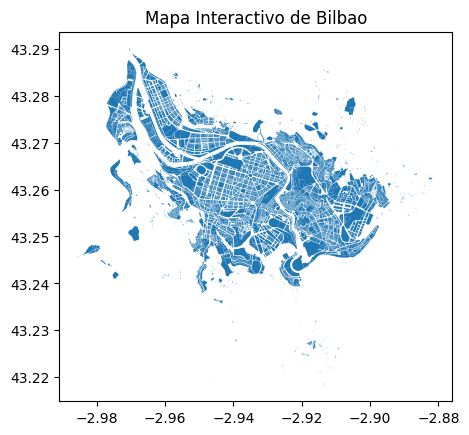

In [7]:
# Cargar el archivo GeoPackage
gdf = gpd.read_file('data/48020.gpkg')

# Configurar el tamaño de la figura
plt.figure(figsize=(30, 30))  # Ajusta el tamaño a tus necesidades (ancho, alto en pulgadas)

# Visualizar el mapa
gdf.plot()
plt.title("Mapa Interactivo de Bilbao")  # Título
plt.show()

In [8]:
gdf.head()

,referencia_catastral,codigo_ine,nombre_municipio,codigo_provincia,zona_climatica,uso_principal,altura_maxima,altura_maxima_categoria,tipologia_edificio,ano_construccion,...,numero_viviendas,numero_viviendas_categoria,cluster,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2,coste_intervencion_viv,geometry
0,4802010101001,48020,Bilbao,48,C1,Común,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.97034 43.29004, -2.97032 43..."
1,4802081399166,48020,Bilbao,48,C1,Aparcamiento,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95852 43.25414, -2.9585 43...."
2,4802081399168,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95439 43.25327, -2.95442 43..."
3,4802081399167,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95448 43.25322, -2.95454 43..."
4,4802081399169,48020,Bilbao,48,C1,Almacenaje,NaN,None,None,NaN,...,0,None,None,NaN,NaN,None,None,NaN,NaN,"MULTIPOLYGON (((-2.95956 43.25371, -2.9596 43...."


In [9]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11405 entries, 0 to 11404
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   referencia_catastral                                11405 non-null  object  
 1   codigo_ine                                          11405 non-null  object  
 2   nombre_municipio                                    11405 non-null  object  
 3   codigo_provincia                                    11405 non-null  object  
 4   zona_climatica                                      11405 non-null  object  
 5   uso_principal                                       11405 non-null  object  
 6   altura_maxima                                       8564 non-null   float64 
 7   altura_maxima_categoria                             8564 non-null   object  
 8   tipologia_edificio                                  8564 n

In [10]:
gdf.describe()

,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,coste_intervencion_m2,coste_intervencion_viv
count,8564.000000,8564.000000,8404.000000,11405.000000,8564.000000,8564.000000,8564.000000,8404.000000
mean,5.141990,1950.479449,1641.873751,14.417536,76.090870,24.739019,80.938884,7644.032370
std,2.895819,31.542151,2063.114937,22.364553,32.493175,6.679430,23.601817,5306.814962
min,-3.000000,1700.000000,3.000000,0.000000,22.450000,12.480000,0.000000,475.040000
25%,3.000000,1930.000000,441.750000,1.000000,58.260000,20.740000,62.270000,4939.397500
50%,5.000000,1958.000000,1142.500000,9.000000,69.650000,24.470000,72.640000,6275.830000
75%,7.000000,1969.000000,2061.250000,20.000000,74.030000,25.040000,88.870000,8439.752500
max,27.000000,2017.000000,38495.000000,535.000000,155.260000,52.390000,150.380000,175984.520000


In [11]:
# Especificar las columnas a mantener
selected_columns = [
    "referencia_catastral", 
    "uso_principal", "altura_maxima", 
    "ano_construccion", "superficie_vivienda", 
    "numero_viviendas", "demanda_calefaccion", 
    "demanda_calefaccion_post_interverncion", "calificacion_demanda_calefaccion", 
    "calificacion_demanda_calefaccion_post_intervencion", "coste_intervencion_m2"
]

# Filtrar el DataFrame para quedarse solo con las columnas deseadas
df_filtered = df[selected_columns]


In [12]:
# Filtrar el DataFrame del CSV para incluir solo uso_principal == 'residencial'
df_residencial = df_filtered[df_filtered['uso_principal'].str.lower() == 'residencial']

# Verificar el número de filas después del filtrado
print(f"Número de edificios residenciales: {df_residencial.shape[0]}")

Número de edificios residenciales: 8260


In [13]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8260 entries, 7 to 11404
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8260 non-null   int64  
 1   uso_principal                                       8260 non-null   object 
 2   altura_maxima                                       8260 non-null   float64
 3   ano_construccion                                    8260 non-null   float64
 4   superficie_vivienda                                 8117 non-null   float64
 5   numero_viviendas                                    8260 non-null   int64  
 6   demanda_calefaccion                                 8260 non-null   float64
 7   demanda_calefaccion_post_interverncion              8260 non-null   float64
 8   calificacion_demanda_calefaccion                    8260 non-null   object 
 9   c

In [14]:
# Eliminar filas con valores nulos
df_residencial = df_residencial.dropna()

In [15]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8117 entries, 7 to 11404
Data columns (total 11 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8117 non-null   int64  
 1   uso_principal                                       8117 non-null   object 
 2   altura_maxima                                       8117 non-null   float64
 3   ano_construccion                                    8117 non-null   float64
 4   superficie_vivienda                                 8117 non-null   float64
 5   numero_viviendas                                    8117 non-null   int64  
 6   demanda_calefaccion                                 8117 non-null   float64
 7   demanda_calefaccion_post_interverncion              8117 non-null   float64
 8   calificacion_demanda_calefaccion                    8117 non-null   object 
 9   c

In [16]:
#df_residencial.to_excel('data/residencial.xlsx', index=False)

In [17]:
df_residencial['referencia_catastral'].nunique()

8117

In [18]:
# Eliminar la columna 'uso_principal' del DataFrame
df_residencial = df_residencial.drop(columns=['uso_principal' ])

# Verificar que la columna ha sido eliminada
df_residencial.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8117 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                8117 non-null   int64  
 1   altura_maxima                                       8117 non-null   float64
 2   ano_construccion                                    8117 non-null   float64
 3   superficie_vivienda                                 8117 non-null   float64
 4   numero_viviendas                                    8117 non-null   int64  
 5   demanda_calefaccion                                 8117 non-null   float64
 6   demanda_calefaccion_post_interverncion              8117 non-null   float64
 7   calificacion_demanda_calefaccion                    8117 non-null   object 
 8   calificacion_demanda_calefaccion_post_intervencion  8117 non-null   object 
 9   c

In [19]:
# Filtrar el DataFrame eliminando las filas donde 'calificacion_demanda_calefaccion' sea 'd'
df_residencial = df_residencial[df_residencial['calificacion_demanda_calefaccion'] != 'D']

# Verificar el resultado
print(df_residencial['calificacion_demanda_calefaccion'].value_counts())


calificacion_demanda_calefaccion
E    5943
G     795
F     644
Name: count, dtype: int64


In [20]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7382 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7382 non-null   int64  
 1   altura_maxima                                       7382 non-null   float64
 2   ano_construccion                                    7382 non-null   float64
 3   superficie_vivienda                                 7382 non-null   float64
 4   numero_viviendas                                    7382 non-null   int64  
 5   demanda_calefaccion                                 7382 non-null   float64
 6   demanda_calefaccion_post_interverncion              7382 non-null   float64
 7   calificacion_demanda_calefaccion                    7382 non-null   object 
 8   calificacion_demanda_calefaccion_post_intervencion  7382 non-null   object 
 9   c

In [21]:
#df_residencial.to_excel('data/residencial.xlsx', index=False)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las columnas de tipo 'object' manteniendo el orden
for col in ['calificacion_demanda_calefaccion', 'calificacion_demanda_calefaccion_post_intervencion']:
    df_residencial[col] = label_encoder.fit_transform(df_residencial[col])

In [23]:
df_residencial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7382 entries, 7 to 11404
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   referencia_catastral                                7382 non-null   int64  
 1   altura_maxima                                       7382 non-null   float64
 2   ano_construccion                                    7382 non-null   float64
 3   superficie_vivienda                                 7382 non-null   float64
 4   numero_viviendas                                    7382 non-null   int64  
 5   demanda_calefaccion                                 7382 non-null   float64
 6   demanda_calefaccion_post_interverncion              7382 non-null   float64
 7   calificacion_demanda_calefaccion                    7382 non-null   int32  
 8   calificacion_demanda_calefaccion_post_intervencion  7382 non-null   int32  
 9   c

In [24]:
df_residencial.head()

,referencia_catastral,altura_maxima,ano_construccion,superficie_vivienda,numero_viviendas,demanda_calefaccion,demanda_calefaccion_post_interverncion,calificacion_demanda_calefaccion,calificacion_demanda_calefaccion_post_intervencion,coste_intervencion_m2
7,4802012431001,3.0,1900.0,1038.0,17,74.03,24.01,0,1,72.64
15,4802012435002,4.0,1920.0,543.0,5,74.03,24.47,0,1,72.64
43,4802012453007,2.0,1900.0,424.0,3,109.05,34.14,2,2,99.23
58,4802012453022,4.0,1910.0,764.0,8,74.03,24.47,0,1,72.64
74,4802020111006,1.0,1920.0,253.0,5,109.05,34.71,2,2,99.23


In [25]:
#df_residencial.to_excel('data/residencial2.xlsx', index=False)

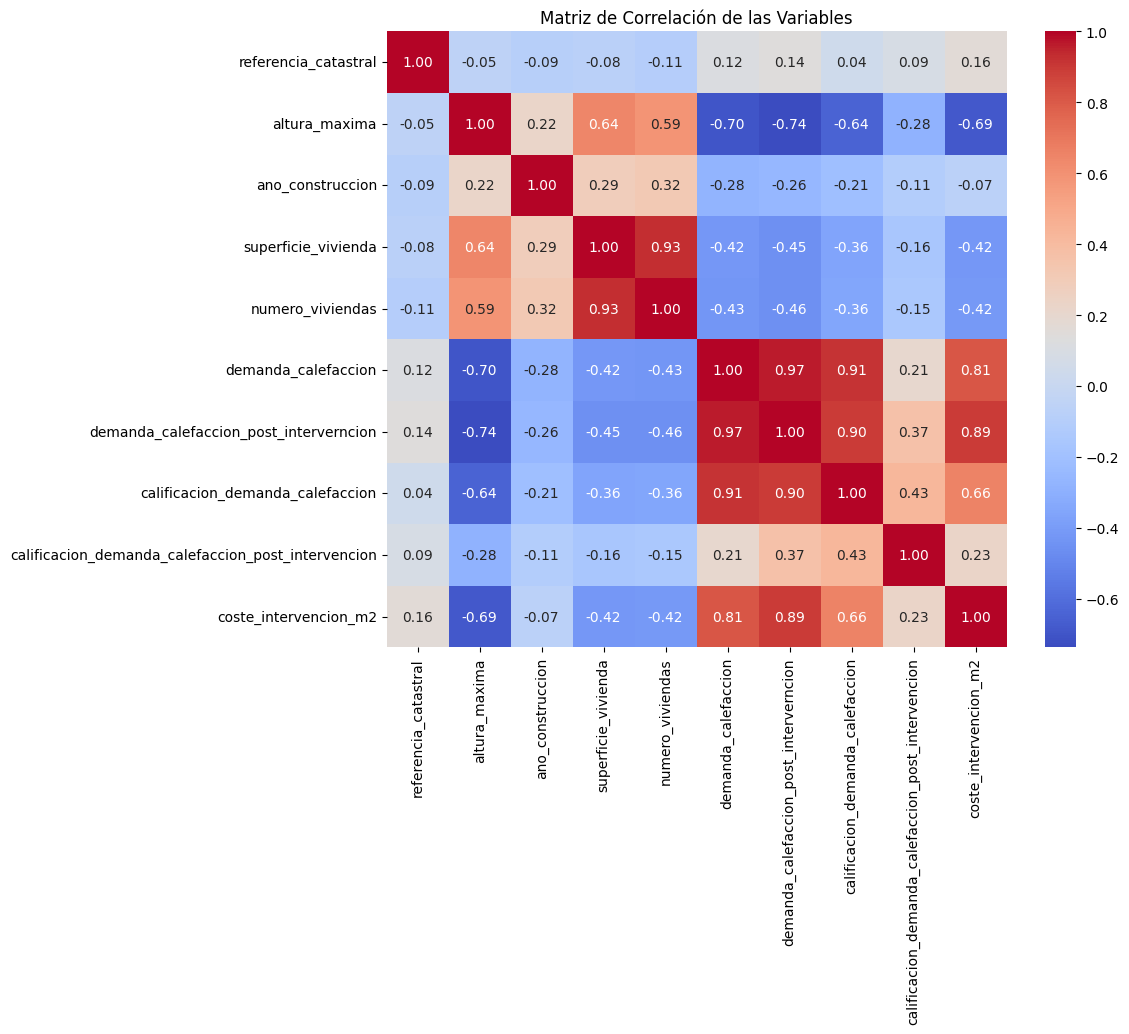

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = df_residencial.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Matriz de Correlación de las Variables")
plt.show()


In [29]:
# Separar variables predictoras (X) y variable objetivo (y)
X = df_residencial.drop(columns=['coste_intervencion_m2', 'demanda_calefaccion', 'referencia_catastral', 'demanda_calefaccion_post_interverncion', 'calificacion_demanda_calefaccion_post_intervencion','calificacion_demanda_calefaccion', 'superficie_vivienda'])
#
y = df_residencial['coste_intervencion_m2']


In [30]:
from sklearn.model_selection import train_test_split

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
'''
# Verificar si hay intersección entre los conjuntos de entrenamiento y prueba
train_referencias = set(X_train['referencia_catastral'])
test_referencias = set(X_test['referencia_catastral'])

# Comprobar solapamiento
intersection = train_referencias.intersection(test_referencias)
if len(intersection) > 0:
    print(f"¡Atención! Hay {len(intersection)} referencias compartidas entre train y test.")
else:
    print("Los conjuntos de entrenamiento y prueba están correctamente separados.")
'''


'\n# Verificar si hay intersección entre los conjuntos de entrenamiento y prueba\ntrain_referencias = set(X_train[\'referencia_catastral\'])\ntest_referencias = set(X_test[\'referencia_catastral\'])\n\n# Comprobar solapamiento\nintersection = train_referencias.intersection(test_referencias)\nif len(intersection) > 0:\n    print(f"¡Atención! Hay {len(intersection)} referencias compartidas entre train y test.")\nelse:\n    print("Los conjuntos de entrenamiento y prueba están correctamente separados.")\n'

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

            Feature       VIF
0     altura_maxima  6.414106
1  ano_construccion  4.256147
2  numero_viviendas  2.676473


# Análisis del VIF (Factor de Inflación de Varianza)

## Observaciones clave:
1. **`referencia_catastral` (VIF = 6295):**
   - Es un identificador único y no tiene valor predictivo. **Debe eliminarse.**

2. **`demanda_calefaccion` (VIF = 58.70) y `demanda_calefaccion_post_interverncion` (VIF = 37.39):**
   - Estas variables están altamente correlacionadas entre sí. Se recomienda conservar solo una de ellas, preferentemente `demanda_calefaccion_post_interverncion`, que tiene una mayor correlación con el target (`coste_intervencion_m2`).

3. **`calificacion_demanda_calefaccion` (VIF = 13.03):**
   - Presenta redundancia con otras variables relacionadas con la demanda energética. Si el modelo no mejora significativamente al incluirla, podría eliminarse.

4. **Variables con VIF moderado:**
   - `superficie_vivienda` (VIF = 8.17) y `numero_viviendas` (VIF = 7.50) están correlacionadas entre sí, pero ambas tienen importancia interpretativa. Se recomienda evaluar su contribución al modelo.

5. **Variables con VIF bajo:**
   - `altura_maxima`, `ano_construccion` y `calificacion_demanda_calefaccion_post_intervencion` tienen valores aceptables (<5), indicando baja multicolinealidad.

---

## Recomendaciones:
1. **Eliminar `referencia_catastral`:**
   - No aporta valor predictivo y tiene un VIF extremadamente alto.

2. **Seleccionar entre `demanda_calefaccion` y `demanda_calefaccion_post_interverncion`:**
   - Mantener solo la variable más relevante (`demanda_calefaccion_post_interverncion`).

3. **Evaluar `calificacion_demanda_calefaccion`:**
   - Si no mejora significativamente el modelo, podría eliminarse para reducir redundancia.

4. **Reentrenar los modelos con variables refinadas:**
   - Ajustar las variables predictoras eliminando las redundantes y recalcular las métricas de los modelos.

---


In [33]:
from sklearn.preprocessing import StandardScaler

# Escalar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Definir todos los modelos
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Entrenar cada modelo
for model_name, model in models.items():
    print(f"Entrenando modelo: {model_name}")
    model.fit(X_train, y_train)


Entrenando modelo: Random Forest
Entrenando modelo: XGBoost
Entrenando modelo: Gradient Boosting
Entrenando modelo: Linear Regression
Entrenando modelo: KNN Regressor
Entrenando modelo: SVR
Entrenando modelo: Decision Tree


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Definir configuraciones más rápidas y eficientes para los hiperparámetros
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

gbr_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8]
}

# Validación cruzada con búsqueda aleatoria
# 1. Random Forest
rf_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    n_iter=10,  # Limitar el número de combinaciones
    cv=3,  # Menos folds para velocidad
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1  # Paralelización
)
rf_random_search.fit(X_train, y_train)

# 2. XGBoost
xgb_random_search = RandomizedSearchCV(
    XGBRegressor(random_state=42),
    xgb_param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
xgb_random_search.fit(X_train, y_train)

# 3. Gradient Boosting
gbr_random_search = RandomizedSearchCV(
    GradientBoostingRegressor(random_state=42),
    gbr_param_grid,
    n_iter=10,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1
)
gbr_random_search.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print("Random Forest Best Params:", rf_random_search.best_params_)
print("XGBoost Best Params:", xgb_random_search.best_params_)
print("Gradient Boosting Best Params:", gbr_random_search.best_params_)




c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
XGBoost Best Params: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Gradient Boosting Best Params: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Función para calcular métricas
def evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Métricas en train
    metrics['Train_MAE'] = mean_absolute_error(y_train, y_train_pred)
    metrics['Train_RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
    metrics['Train_R2'] = r2_score(y_train, y_train_pred)
    
    # Métricas en test
    metrics['Test_MAE'] = mean_absolute_error(y_test, y_test_pred)
    metrics['Test_RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)
    metrics['Test_R2'] = r2_score(y_test, y_test_pred)
    
    return metrics, y_train_pred, y_test_pred

# Evaluar el modelo
best_model_name = "Random Forest (Optimized)"
best_model = final_models[best_model_name]
metrics, y_train_pred, y_test_pred = evaluate_model(best_model, X_train, y_train, X_test, y_test)

# Crear DataFrames separados para entrenamiento y prueba
train_predictions_df = pd.DataFrame({
    "y_actual": y_train.values,
    "y_pred": y_train_pred
})

test_predictions_df = pd.DataFrame({
    "y_actual": y_test.values,
    "y_pred": y_test_pred
})

# Exportar a Excel
with pd.ExcelWriter(f"{best_model_name.replace(' ', '_')}_predictions.xlsx") as writer:
    train_predictions_df.to_excel(writer, sheet_name="Train Predictions", index=False)
    test_predictions_df.to_excel(writer, sheet_name="Test Predictions", index=False)

print(f"Predicciones exportadas a {best_model_name.replace(' ', '_')}_predictions.xlsx")

c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Predicciones exportadas a Random_Forest_(Optimized)_predictions.xlsx


# **Análisis del rendimiento de los modelos**

## **Resumen de resultados**
| Modelo                      | Train MAE | Train RMSE | Train R² | Test MAE | Test RMSE | Test R²   |
|-----------------------------|-----------|------------|----------|----------|-----------|-----------|
| **Random Forest (Optimized)**   | 0.0084    | 0.3587     | 0.9997   | 0.0363   | 0.7676    | 0.9988    |
| **XGBoost (Optimized)**         | 0.0000    | 0.0001     | 1.0000   | 0.0275   | 0.6968    | 0.9990    |
| **Gradient Boosting (Optimized)** | 0.0020  | 0.0072     | 1.0000   | 0.0382   | 0.8073    | 0.9986    |
| **Linear Regression**           | 10.8247   | 13.7885    | 0.5679   | 10.9144  | 14.0407   | 0.5827    |
| **KNN Regressor**               | 3.5012    | 6.8447     | 0.8935   | 5.0128   | 9.3977    | 0.8131    |
| **SVR**                         | 10.6313   | 14.8915    | 0.4960   | 10.8108  | 15.0932   | 0.5178    |
| **Decision Tree**               | 0.0000    | 0.0000     | 1.0000   | 0.0477   | 1.1004    | 0.9974    |

---

## **Justificación de los resultados**
### **1. Modelos optimizados:**
- **XGBoost (Optimized):**
  - Presenta un excelente rendimiento tanto en entrenamiento como en prueba:
    - **Train RMSE = 0.0001**, **Test RMSE = 0.6968**.
    - El \( R^2 \) es casi perfecto en ambos conjuntos (**Train R² = 1.0000**, **Test R² = 0.9990**).
  - Esto indica que el modelo está capturando muy bien las relaciones entre las variables y no sufre de sobreajuste o subajuste.
  - **Conclusión:** XGBoost generaliza extremadamente bien y es el mejor modelo para este problema.

- **Random Forest (Optimized):**
  - Tiene un rendimiento muy cercano al de XGBoost:
    - **Train RMSE = 0.3587**, **Test RMSE = 0.7676**.
    - El \( R^2 \) en prueba es ligeramente inferior al de XGBoost (**Test R² = 0.9988**).
  - **Conclusión:** Generaliza bien, pero es marginalmente menos preciso que XGBoost.

- **Gradient Boosting (Optimized):**
  - Aunque su rendimiento es muy bueno, tiene un \( R^2 \) ligeramente menor que Random Forest y XGBoost:
    - **Test RMSE = 0.8073**, **Test R² = 0.9986**.
  - **Conclusión:** Generaliza bien, pero no es tan eficiente como XGBoost o Random Forest.

---

### **2. Modelos básicos:**
- **Linear Regression:**
  - Desempeño significativamente inferior:
    - **Test MAE = 10.9144**, **Test R² = 0.5827**.
  - Esto confirma que las relaciones en los datos no son lineales, y los modelos simples no pueden capturar adecuadamente la complejidad del problema.

- **KNN Regressor:**
  - Mejor que la regresión lineal, pero su rendimiento es limitado:
    - **Test RMSE = 9.3977**, **Test R² = 0.8131**.
  - **Conclusión:** El modelo no captura relaciones globales complejas, lo que lo hace menos competitivo frente a los modelos optimizados.

- **SVR:**
  - Desempeño similar al de la regresión lineal:
    - **Test RMSE = 15.0932**, **Test R² = 0.5178**.
  - **Conclusión:** No es adecuado para este problema debido a la complejidad de los datos.

- **Decision Tree:**
  - Aunque tiene un ajuste perfecto en entrenamiento (\( R^2 = 1.0000 \)), muestra menor generalización en prueba:
    - **Test RMSE = 1.1004**, **Test R² = 0.9974**.
  - Esto sugiere que el modelo podría estar ligeramente sobreajustado.

---

## **Conclusiones**
1. **Generalización:**
   - Los modelos optimizados (XGBoost, Random Forest y Gradient Boosting) generalizan bien, mostrando métricas consistentes entre entrenamiento y prueba.
   - Entre ellos, **XGBoost (Optimized)** es el mejor, con el menor error y un \( R^2 \) casi perfecto en prueba.

2. **Modelos básicos:**
   - Los modelos como regresión lineal, KNN y SVR no son adecuados para este problema debido a su incapacidad para capturar la complejidad de los datos.

3. **Modelo recomendado:**
   - **XGBoost (Optimized)** es el modelo más robusto, preciso y eficiente para predecir el coste de intervención por metro cuadrado.

4. **Próximos pasos:**
   - Validación cruzada para confirmar la estabilidad del modelo.
   - Análisis de importancia de características para entender mejor qué variables influyen más en el modelo.


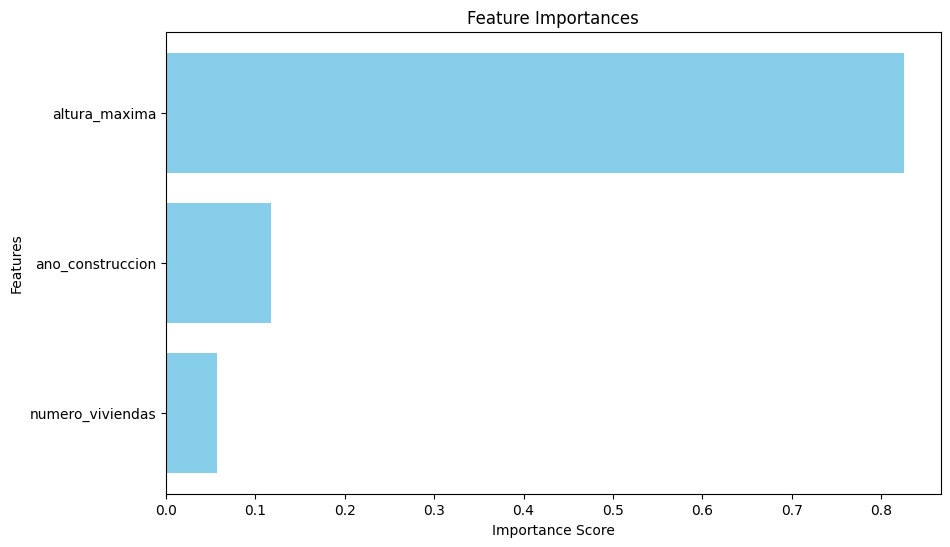

            Feature  Importance
0     altura_maxima    0.825580
1  ano_construccion    0.117584
2  numero_viviendas    0.056836


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Asegúrate de tener el modelo entrenado (por ejemplo, XGBoost)
xgb_model = xgb_random_search.best_estimator_

# Obtener la importancia de características
feature_importances = xgb_model.feature_importances_

# Crear un DataFrame para ordenar y visualizar
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invertir eje para que las características más importantes aparezcan arriba
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Mostrar la tabla de importancia ordenada
print(importance_df)
